## Métodos de Otimização: Métodos Heuristicos

### Recozimento Simulado

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import random
import time
name = 'Recozimento Simulado' 
Start = time.time()

In [2]:
def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

In [3]:
# Método Baseado no algoritmo de Metropolis-Hasting
T = 1000 #Temperatura inicial

nFunc = 34; Qvar = 12
countFunc = 0
nvar=12
Ns=20
Nit=5
RT=0.8
niter_max = 500

xnew=np.zeros(nvar, dtype='float')
xold=np.zeros(nvar, dtype='float')
xbest=np.zeros(nvar, dtype='float')
N=np.zeros(nvar, dtype='float')
Vu=np.zeros(nvar, dtype='float')
V=3*np.ones(nvar, dtype='float')
xmin =np.zeros(Qvar , dtype = 'float')
xmax =np.zeros(Qvar , dtype = 'float')
layout = "{0:.5f}"
fHist = []

#chute incial:
for i in range(0,Qvar):
    xold[i] = 50

Fold, countFunc = f(xold,nFunc,Qvar,countFunc)
xbest = xold.copy(); fbest, countFunc = f(xold,nFunc,Qvar,countFunc)
for i in range(0, Qvar):
    xmin[i] = -100; xmax[i] = 100
fHist.append(fbest)
c = 2
niter = 0
flag = 1
while niter<niter_max:
    for k in range(0,Nit):
        N=np.zeros(nvar, dtype='float')
        for j in range(0,Ns):
            for i in range(0,nvar):
                xnew = xold.copy()
                flag = 1
                R = random.uniform(-1,1)
                xnew[i] = xold[i] + R*V[i]
                if (xnew[i]>xmax[i]) or (xnew[i]<xmin[i]):
                    xnew = xold.copy()
                    flag = 0
                Fnew,countFunc = f(xnew,nFunc,Qvar,countFunc)
                Fold,countFunc = f(xold,nFunc,Qvar,countFunc)
                if (Fnew<Fold) and flag == 1:
                    xold = xnew.copy()
                    N[i] = N[i] + 1
                    if Fnew < fbest:
                        fbest = Fnew
                        xbest = xnew.copy()
                elif flag == 1:
                    P = np.exp((Fold-Fnew)/T)
                    R = random.uniform(0,1)
                    if P > R:
                        xold = xnew.copy()
                        N[i] = N[i] + 1
        for i in range(0,nvar):
            if N[i]>0.6*Ns:
                Vu[i] = V[i]*(1 + c*(N[i]/Ns-0.6)/0.4)
            elif N[i]<0.4*Ns:
                Vu[i] = V[i]/(1+c*(0.4-N[i]/Ns)/0.4)
            else:
                Vu[i] = V[i]
        V = Vu.copy()
    T = T*RT
    for i in range(0, Qvar):
        print(layout.format(xbest[i]), end =" ")
    print(layout.format(fbest))
    fHist.append(fbest)
    niter += 1

71.98427 7.81842 -95.30164 -17.28112 -56.37499 -12.56083 -35.61206 -28.21848 6.84277 -24.88708 -10.92495 -5.31965 19134541243631479554048.00000
87.84617 -53.62120 -54.73164 -57.78929 -60.66083 -62.60629 -65.63538 -66.55654 -12.26220 -73.17773 -75.60928 -55.23909 20755905764054752.00000
18.73186 -34.32495 -48.00340 -59.79019 -57.75865 -62.19352 -66.54214 -68.43759 -41.66732 -71.52250 -74.34750 -77.91246 15236908531223.19922
-99.66186 -40.05895 -52.78450 -56.83668 -58.21161 -60.97609 -65.77705 -67.42786 -70.07022 -72.23627 -75.85591 -77.21950 130.05741
-4.72293 -50.49173 -48.83894 -53.22487 -60.73320 -64.10720 -64.35691 -69.22920 -72.12005 -72.53258 -74.66129 -76.41214 129.92000
-25.99106 -42.41458 -52.31182 -55.47979 -60.16540 -63.96313 -65.05853 -69.71549 -71.74015 -73.89043 -74.49808 -78.12583 38.22809
-25.99106 -42.41458 -52.31182 -55.47979 -60.16540 -63.96313 -65.05853 -69.71549 -71.74015 -73.89043 -74.49808 -78.12583 38.22809
-49.66761 -46.76021 -52.13129 -53.87343 -58.57618 -63.68

In [4]:
print(T)

2.0370359763344978e-07


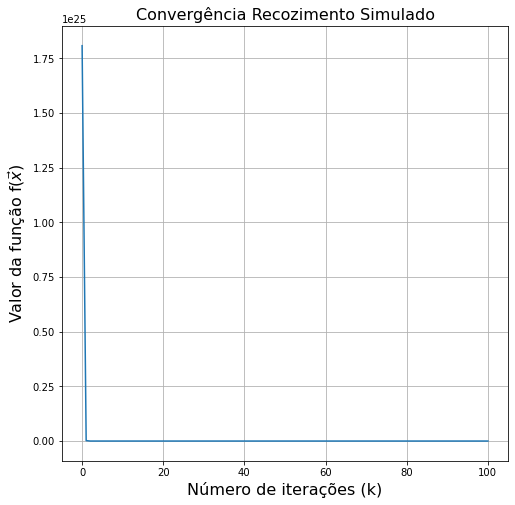

In [5]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,niter_max+1),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [6]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  240002
Tempo de Execução = 4414.910945415497 s
